In [9]:
from simple.binance import getHistMonth
from simple.chart import chartFigure, updateFigure
from simple.pretty import pmap
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [17]:
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.subplot.left'] = 0.04
plt.rcParams['figure.subplot.right'] = 0.96
plt.rcParams['figure.subplot.top'] = 0.96
plt.rcParams['figure.subplot.bottom'] = 0.04
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['figure.figsize'] = (14,4)

In [2]:
frame = '1h'

tickers = [
    '1000BTTCUSDT', '1000SHIBUSDT', '1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ADABUSD', 'ADAUSDT', 'AKROUSDT',
    'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT', 'ANTUSDT', 'API3USDT', 'ARPAUSDT', 'ARUSDT', 'ATAUSDT', 'ATOMUSDT',
    'AUDIOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT', 'BLZUSDT',
    'BNBBUSD', 'BNBUSDT', 'BTCBUSD', 'BTCDOMUSDT', 'BTCSTUSDT', 'BTCUSDT', 'BTSUSDT', 'C98USDT', 'CELOUSDT', 'CELRUSDT',
    'CHRUSDT', 'CHZUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVCUSDT', 'DASHUSDT', 'DEFIUSDT',
    'DENTUSDT', 'DGBUSDT', 'DODOUSDT', 'DOGEBUSD', 'DOGEUSDT', 'DOTUSDT', 'DUSKUSDT', 'DYDXUSDT', 'EGLDUSDT', 'ENJUSDT',
    'ENSUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHBUSD', 'ETHUSDT', 'FILUSDT', 'FLMUSDT', 'FLOWUSDT', 'FTMUSDT', 'FTTBUSD',
    'GALAUSDT', 'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HNTUSDT', 'HOTUSDT', 'ICPUSDT', 'ICXUSDT', 'IMXUSDT', 'IOSTUSDT',
    'IOTAUSDT', 'IOTXUSDT', 'KAVAUSDT', 'KLAYUSDT', 'KNCUSDT', 'KSMUSDT', 'LINAUSDT', 'LINKUSDT', 'LITUSDT', 'LPTUSDT',
    'LRCUSDT', 'LTCUSDT', 'LUNAUSDT', 'MANAUSDT', 'MASKUSDT', 'MATICUSDT', 'MKRUSDT', 'MTLUSDT', 'NEARUSDT', 'NEOUSDT',
    'NKNUSDT', 'OCEANUSDT', 'OGNUSDT', 'OMGUSDT', 'ONEUSDT', 'ONTUSDT', 'PEOPLEUSDT', 'QTUMUSDT', 'RAYUSDT', 'REEFUSDT',
    'RENUSDT', 'RLCUSDT', 'ROSEUSDT', 'RSRUSDT', 'RUNEUSDT', 'RVNUSDT', 'SANDUSDT', 'SCUSDT', 'SFPUSDT', 'SKLUSDT',
    'SNXUSDT', 'SOLBUSD', 'SOLUSDT', 'SRMUSDT', 'STMXUSDT', 'STORJUSDT', 'SUSHIUSDT', 'SXPUSDT', 'THETAUSDT', 'TLMUSDT',
    'TOMOUSDT', 'TRBUSDT', 'TRXUSDT', 'UNFIUSDT', 'UNIUSDT', 'VETUSDT', 'WAVESUSDT', 'XEMUSDT', 'XLMUSDT', 'XMRUSDT',
    'XRPBUSD', 'XRPUSDT', 'XTZUSDT', 'YFIIUSDT', 'YFIUSDT', 'ZECUSDT', 'ZENUSDT', 'ZILUSDT', 'ZRXUSDT'
]

In [3]:
def getClose(ticker: str) -> pd.Series:
    return getHistMonth('2022-03', '2022-03', ticker, frame, close_only=True, spot=False)

In [4]:
# parallel load data from binance archive
Close = pd.concat(pmap(getClose, tickers, n_jobs=32), axis=1)
Close.head()

  0%|          | 0/147 [00:00<?, ?it/s]

,1000BTTCUSDT,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADABUSD,ADAUSDT,AKROUSDT,ALGOUSDT,ALICEUSDT,...,XMRUSDT,XRPBUSD,XRPUSDT,XTZUSDT,YFIIUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
DT,,,,,,,,,,,,,,,,,,,,,
2022-03-01 00:00:00,0.002000,0.026112,0.07946,1.5258,147.71,0.9772,0.9769,0.01429,0.8786,7.787,...,173.42,0.7849,0.7848,3.574,2104.8,21770.0,119.97,39.091,0.04507,0.5846
2022-03-01 01:00:00,0.001979,0.025770,0.07808,1.4963,144.48,0.9671,0.9665,0.01412,0.8621,7.588,...,172.18,0.7711,0.7711,3.523,2084.6,21508.0,119.12,38.791,0.04463,0.5751
2022-03-01 02:00:00,0.001982,0.025634,0.07743,1.4839,144.06,0.9729,0.9722,0.01402,0.8601,7.474,...,171.62,0.7691,0.7687,3.520,2074.2,21374.0,117.72,38.725,0.04481,0.5723
2022-03-01 03:00:00,0.001978,0.025689,0.07754,1.4832,142.36,0.9662,0.9659,0.01397,0.8580,7.456,...,172.63,0.7746,0.7745,3.488,2068.0,21436.0,116.48,38.795,0.04471,0.5725
2022-03-01 04:00:00,0.001979,0.025857,0.07841,1.4977,143.90,0.9654,0.9651,0.01413,0.8671,7.587,...,173.50,0.7769,0.7765,3.531,2090.9,21783.0,117.97,39.293,0.04495,0.5762


In [5]:
x = StandardScaler().fit_transform(Close.values)
x.shape

(744, 147)

In [34]:
C = pd.DataFrame(x, index=Close.index, columns=Close.columns)
C

,1000BTTCUSDT,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADABUSD,ADAUSDT,AKROUSDT,ALGOUSDT,ALICEUSDT,...,XMRUSDT,XRPBUSD,XRPUSDT,XTZUSDT,YFIIUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
DT,,,,,,,,,,,,,,,,,,,,,
2022-03-01 00:00:00,0.895241,1.175754,-0.090893,0.129655,0.043522,0.267080,0.267476,1.376988,0.946994,1.604828,...,-0.874307,-0.176577,-0.173435,0.897583,0.242563,0.921869,-1.234849,-0.378109,-0.324374,0.245851
2022-03-01 01:00:00,0.726047,0.982728,-0.263277,-0.046672,-0.068324,0.197549,0.195837,1.227518,0.747441,1.318837,...,-0.944504,-0.476442,-0.471284,0.730096,0.132189,0.751982,-1.263148,-0.436341,-0.336804,0.141547
2022-03-01 02:00:00,0.750218,0.905970,-0.344472,-0.120789,-0.082868,0.237477,0.235100,1.139594,0.723253,1.155003,...,-0.976206,-0.519901,-0.523462,0.720244,0.075363,0.665094,-1.309757,-0.449152,-0.331719,0.110805
2022-03-01 03:00:00,0.717991,0.937012,-0.330732,-0.124973,-0.141734,0.191353,0.191704,1.095632,0.697855,1.129134,...,-0.919030,-0.400390,-0.397365,0.615154,0.041486,0.705296,-1.351040,-0.435565,-0.334544,0.113000
2022-03-01 04:00:00,0.726047,1.031831,-0.222055,-0.038304,-0.088408,0.185846,0.186193,1.236310,0.807912,1.317400,...,-0.869779,-0.350412,-0.353884,0.756368,0.166612,0.930298,-1.301434,-0.338900,-0.327764,0.153624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 19:00:00,2.208507,0.999660,1.480548,1.454194,2.137783,1.438772,1.441252,1.983663,1.394476,1.245542,...,1.377085,0.420980,0.420088,1.396758,1.050149,1.472380,0.753043,1.433484,3.349418,2.316561
2022-03-31 20:00:00,2.127938,1.095044,1.515525,1.589278,2.182453,1.500041,1.503247,2.071586,1.454947,1.326022,...,1.383878,0.507897,0.507051,1.462439,1.085665,1.507395,0.748715,1.478905,3.499420,2.393416
2022-03-31 21:00:00,2.192393,1.100124,1.464309,1.611394,2.152327,1.511744,1.513580,2.194680,1.494858,1.307340,...,1.365763,0.536145,0.533140,1.449303,1.058345,1.470435,0.740392,1.462018,3.448290,2.383535


In [36]:
k = 10
pca = PCA(n_components=k)
Components = pca.fit_transform(x)
X = pd.DataFrame(data=Components, index=Close.index)
X

,0,1,2,3,4,5,6,7,8,9
DT,,,,,,,,,,
2022-03-01 00:00:00,3.640781,7.434499,-2.248188,0.222921,-0.691576,1.065815,1.998776,0.376363,-2.145404,-0.145190
2022-03-01 01:00:00,2.139591,7.266321,-2.029147,0.054995,-0.422866,1.010605,2.028983,0.557446,-1.876727,-0.020610
2022-03-01 02:00:00,1.727844,7.112679,-1.920650,-0.027051,-0.334069,1.021082,2.027289,0.522923,-1.798012,-0.057787
2022-03-01 03:00:00,1.558288,7.106021,-1.991817,-0.034189,-0.377807,1.108365,2.129562,0.484894,-1.781994,-0.029162
2022-03-01 04:00:00,2.560139,7.356043,-2.105915,0.052962,-0.546973,1.042225,2.137838,0.501372,-1.881975,-0.036397
...,...,...,...,...,...,...,...,...,...,...
2022-03-31 19:00:00,20.257005,-0.410035,6.223522,1.410517,3.464975,-0.798750,-0.360821,2.612964,0.155302,-0.565550
2022-03-31 20:00:00,21.120381,-0.219636,6.267548,1.589431,3.519836,-0.795465,-0.347159,2.637510,0.141399,-0.598944
2022-03-31 21:00:00,21.018593,-0.209027,6.189128,1.596551,3.440155,-0.747993,-0.330857,2.624022,-0.042352,-0.697532


In [37]:
pca.explained_variance_ratio_

array([0.83033429, 0.07470202, 0.02581985, 0.01229744, 0.00868996,
       0.00763835, 0.00453851, 0.00431177, 0.00402648, 0.00306176])

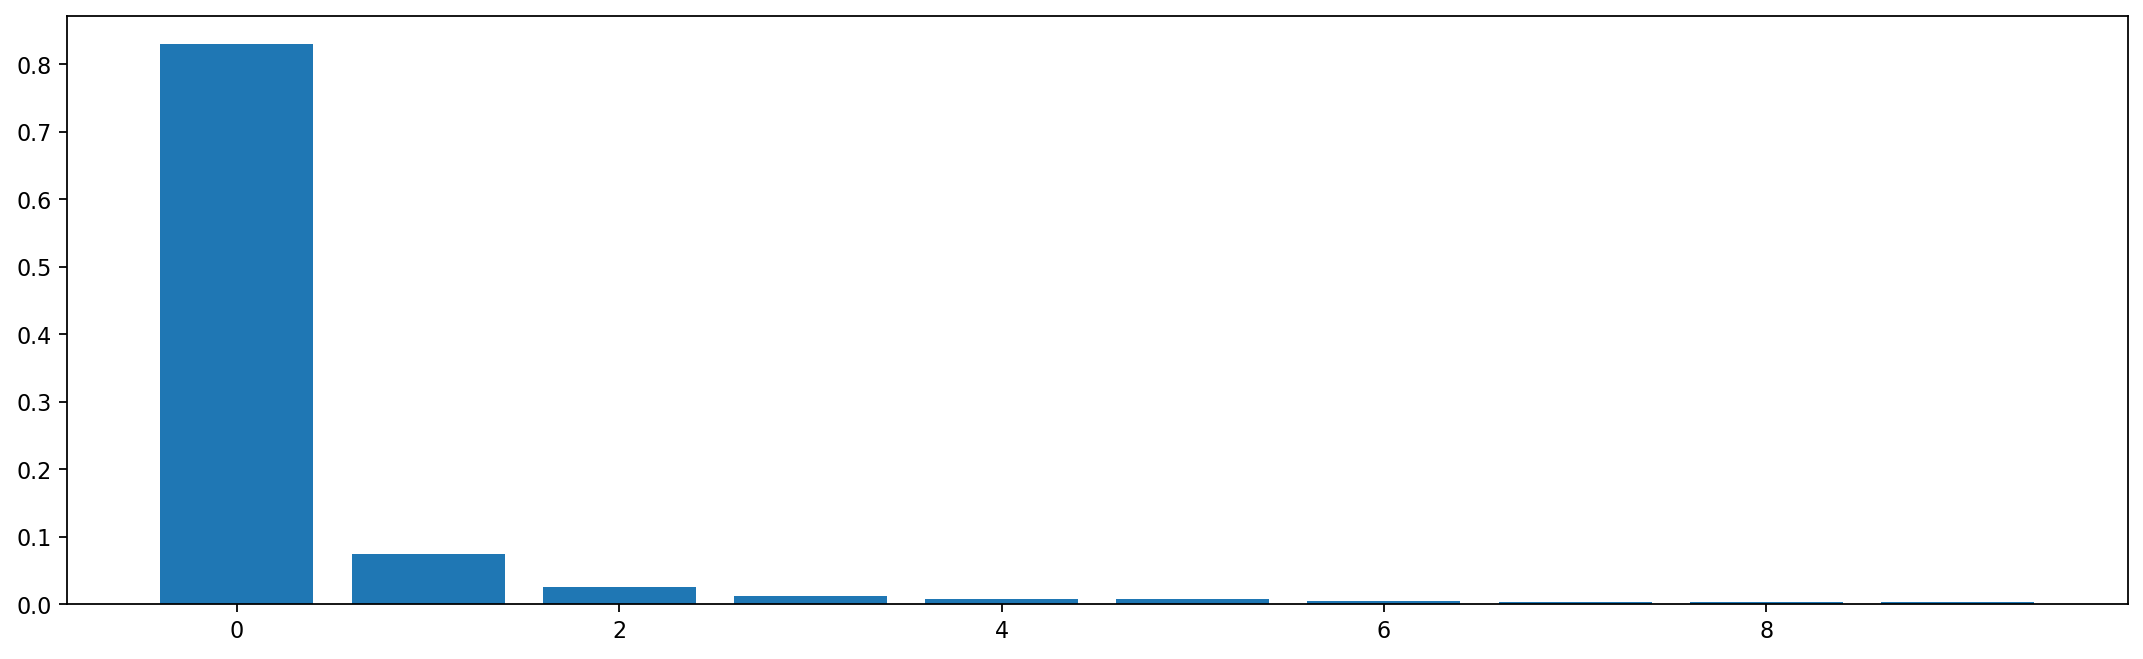

In [38]:
plt.bar(x=range(k), height=pca.explained_variance_ratio_);

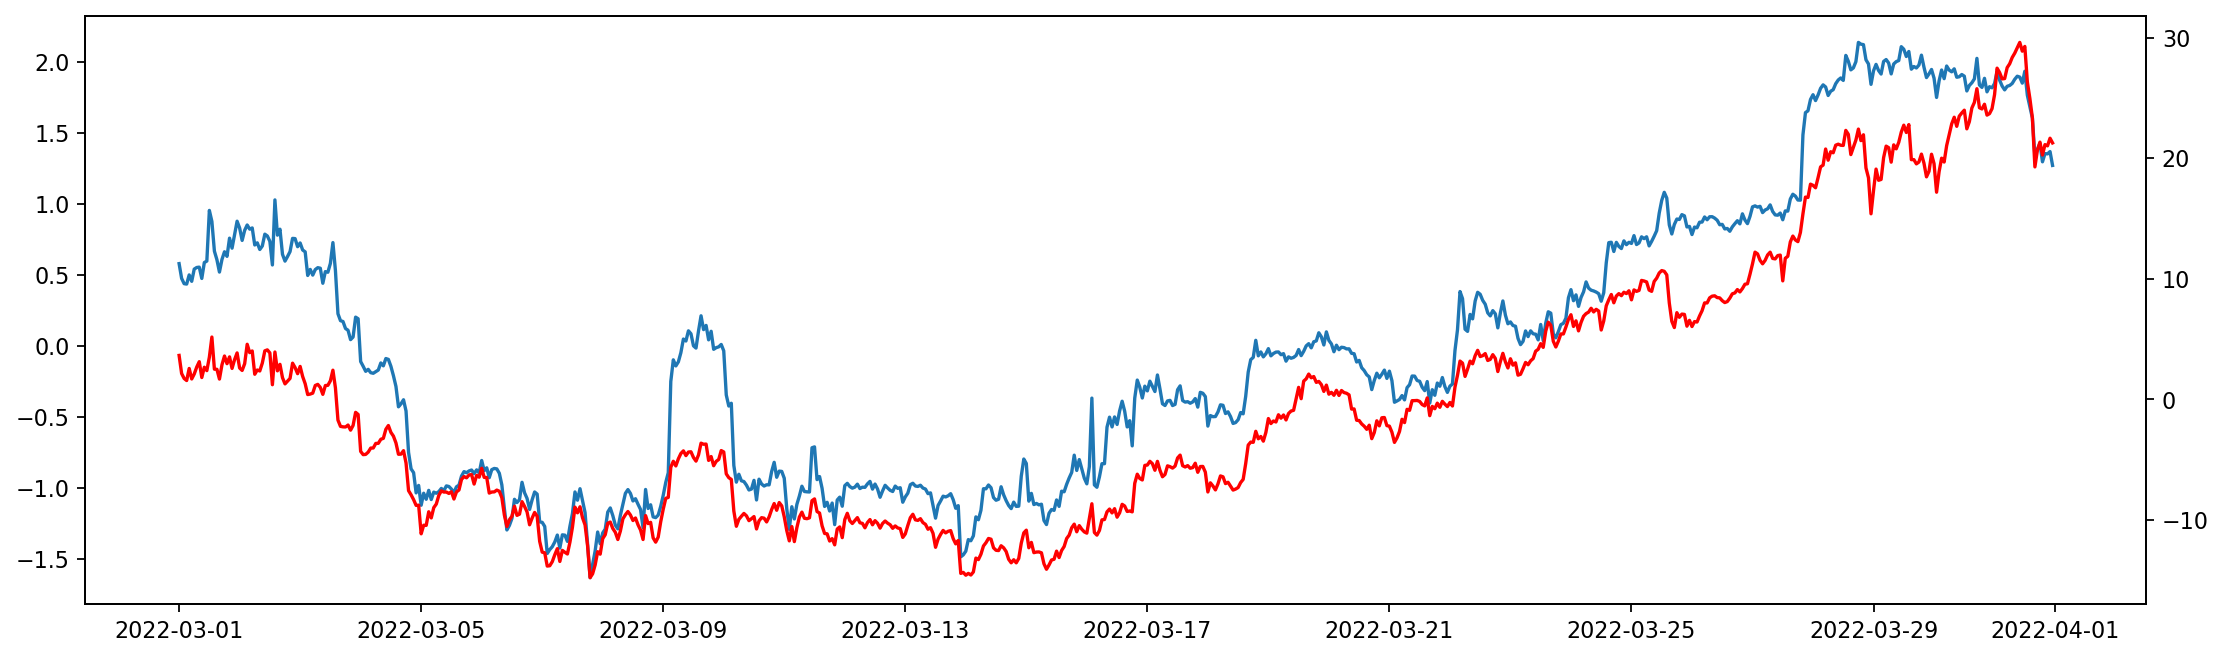

In [39]:
plt.plot(C.BTCUSDT)
plt.twinx().plot(X[0], color='red');